In [70]:
from sklearn.ensemble import RandomForestClassifier
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from image_process import appply_filter
import matplotlib.pyplot as mpl

In [3]:
randomForestCls=RandomForestClassifier(n_estimators=100)

In [4]:
X=[[3,3],[4,2],[5,1],[1,1],[2,1],[2,3]]
Y=[1,1,1,0,0,0]

In [5]:
randomForestCls.fit(X, Y)

RandomForestClassifier()

In [6]:
randomForestCls.predict(X)

array([1, 1, 1, 0, 0, 0])

In [7]:
X=[[1,5],[2,4],[7,7],[8,0]]
Y=[1,1,0,0]

In [8]:
randomForestCls.fit(X, Y)

RandomForestClassifier()

In [9]:
randomForestCls.predict(X)

array([1, 1, 0, 0])

In [10]:
randomForestCls.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
lmbda=60
theta=45
gamma=0.5
sigma=30
psi=np.pi/2
kernels=[cv.getGaborKernel((5, 5),sigma,theta,lmbda,gamma,psi,ktype=cv.CV_32F) for psi in (0,np.pi/2,np.pi)]

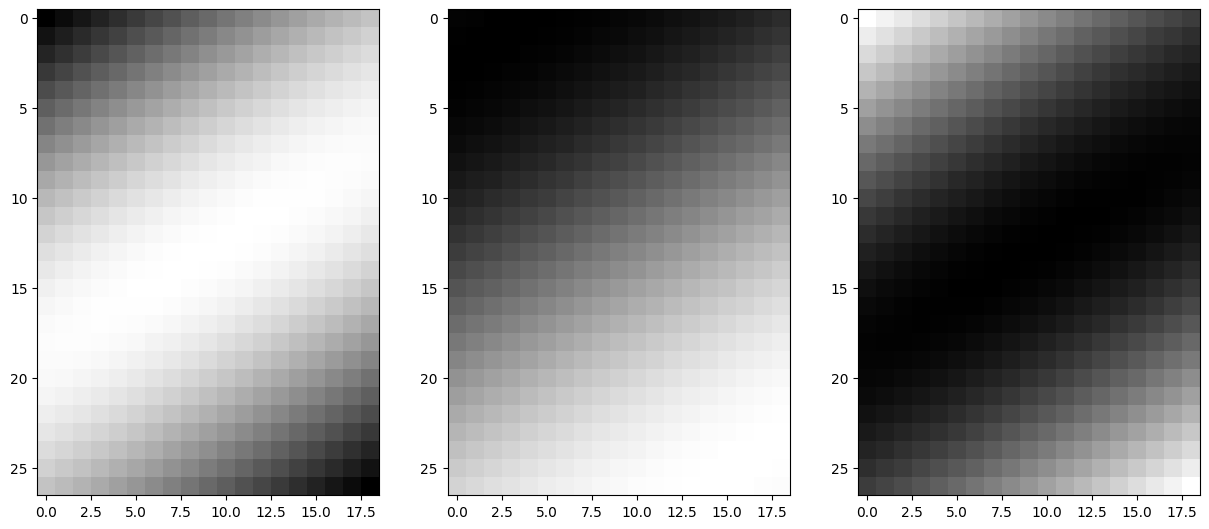

In [62]:
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(kernels):
    ax[i].imshow(j,cmap='gray')

In [77]:
im=cv.imread("zebra.jpg")
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [64]:
data_f,raw_features=appply_filter(gray,kernels,"teta")

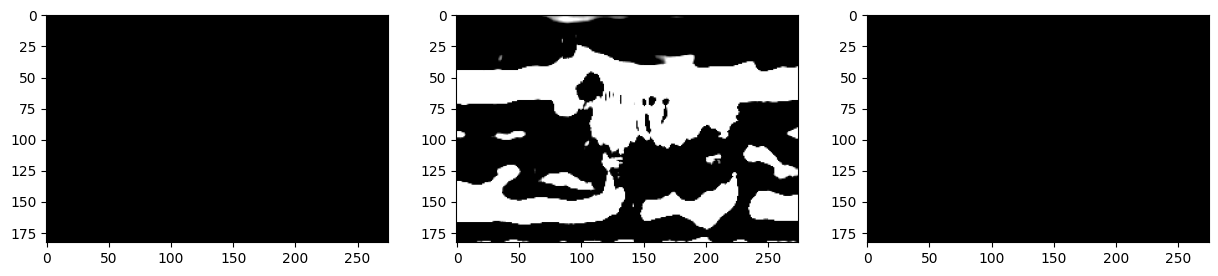

In [65]:
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(raw_features):
    ax[i].imshow(j,cmap='gray')

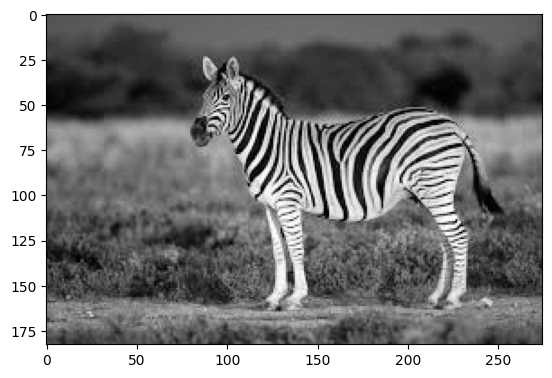

In [66]:
plt.imshow(gray,cmap='gray')

In [68]:
raw_features

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[  0,   9,  19, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 154,  39,   0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

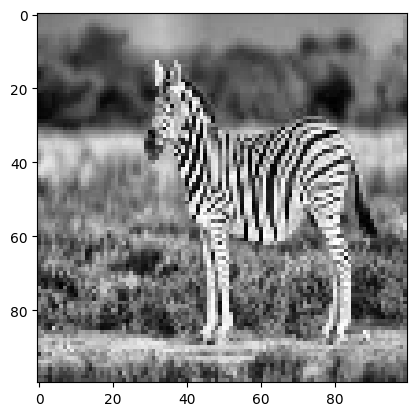

In [78]:
def preprocess(img,size=(100,100)):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    resized=cv.resize(gray,size)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    normalized = clahe.apply(resized)
    return normalized
img=preprocess(im)
mpl.imshow(img,cmap='gray');

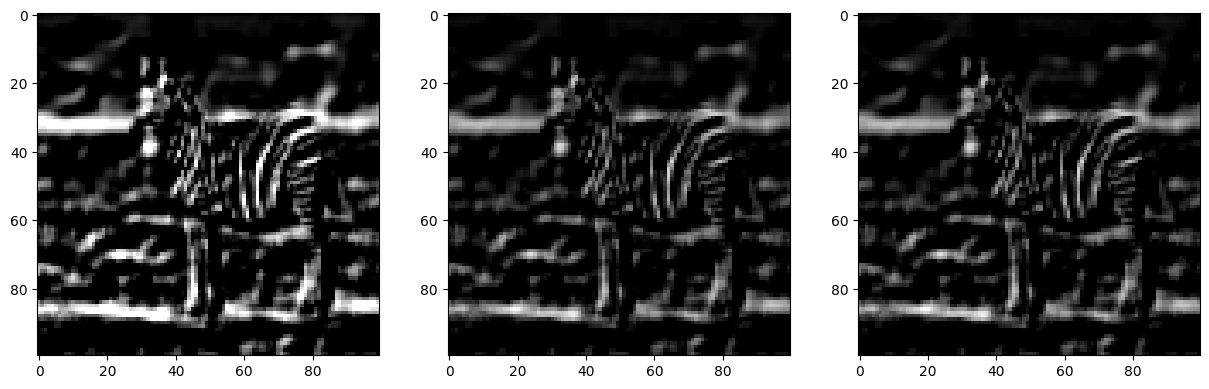

In [100]:
lmbda=60
theta=45
gamma=0.5
sigma=30
psi=np.pi/2
kernels=[cv.getGaborKernel((5, 5),sigma,theta,lmbda,gamma,psi,ktype=cv.CV_32F) for lmbda in (30,60,100)]
data_f,raw_features=appply_filter(img,kernels,"teta")
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(raw_features):
    ax[i].imshow(j,cmap='gray')

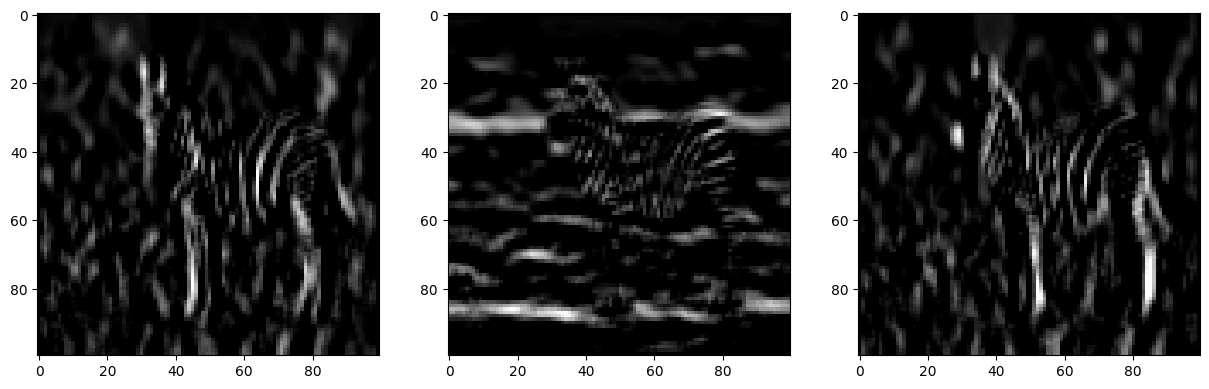

In [101]:
kernels=[cv.getGaborKernel((5, 5),sigma,theta,lmbda,gamma,psi,ktype=cv.CV_32F) for theta in (0,np.pi/2,np.pi)]
data_f,raw_features=appply_filter(img,kernels,"teta")
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(raw_features):
    ax[i].imshow(j,cmap='gray')

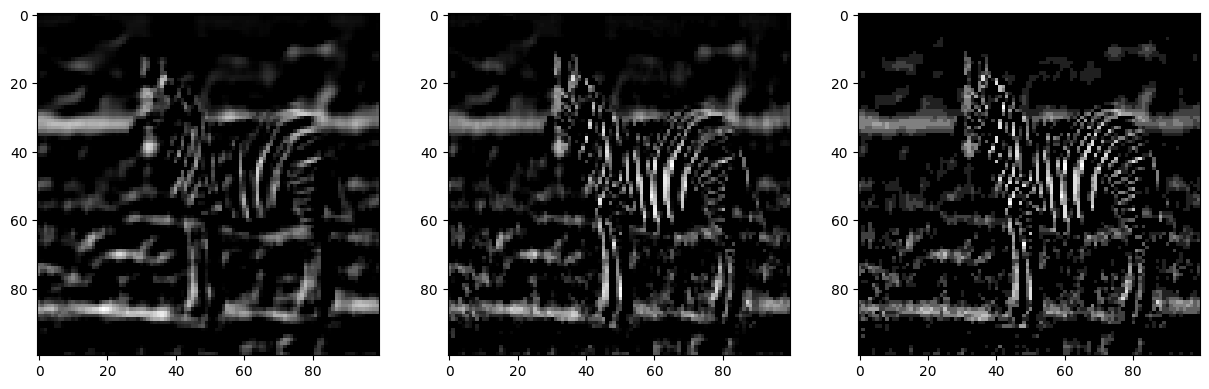

In [111]:
kernels=[cv.getGaborKernel((5, 5),sigma,theta,lmbda,gamma,psi,ktype=cv.CV_32F) for gamma in (0,100,300)]
data_f,raw_features=appply_filter(img,kernels,"teta")
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(raw_features):
    ax[i].imshow(j,cmap='gray')

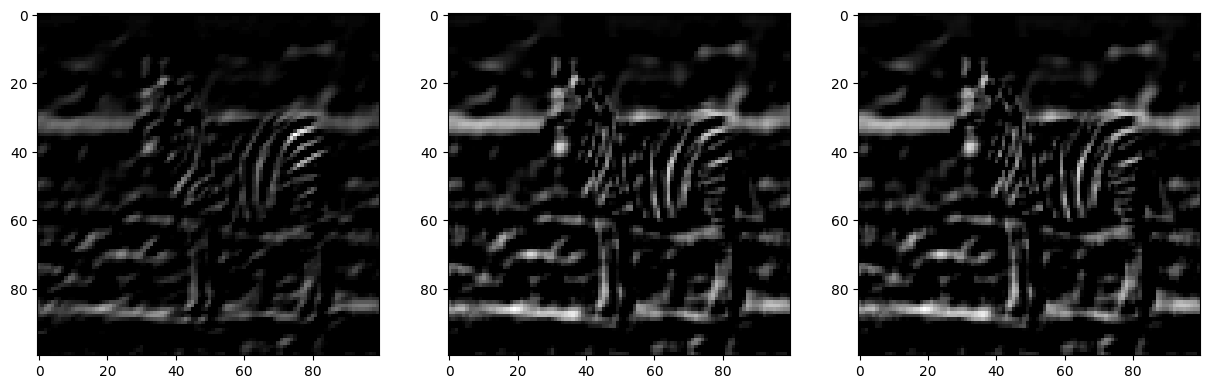

In [103]:
kernels=[cv.getGaborKernel((5, 5),sigma,theta,lmbda,gamma,psi,ktype=cv.CV_32F) for sigma in (1,3,5)]
data_f,raw_features=appply_filter(img,kernels,"teta")
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(raw_features):
    ax[i].imshow(j,cmap='gray')

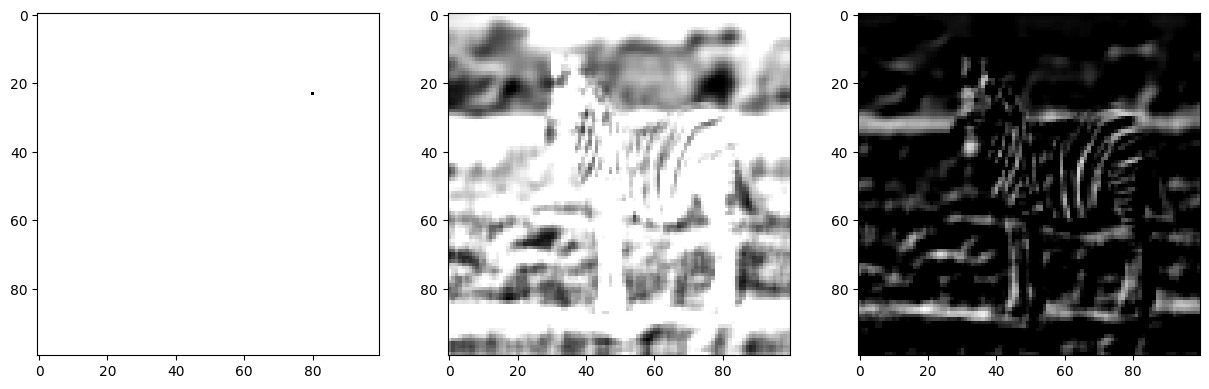

In [129]:
kernels=[cv.getGaborKernel((5, 5),sigma,theta,lmbda,gamma,psi,ktype=cv.CV_32F) for psi in (0,np.pi/2.1,np.pi/2)]
data_f,raw_features=appply_filter(img,kernels,"teta")
fig,ax=plt.subplots(1,3,figsize=(15,15))
for i,j in enumerate(raw_features):
    ax[i].imshow(j,cmap='gray')

In [ ]:
rows=int(np.ceil(len(k)/6))
fig, axs = mpl.subplots(rows, 6,figsize=(20,50))
for i in range(6):
    for j in range(rows):
        axs[j,i].imshow(f[j*(i+1)],cmap='gray')